In [2]:
import pandas as pd
import numpy as np

In [3]:
lieux = pd.read_csv('lieux-2022.csv', index_col = 'Num_Acc', sep=';')


/var/folders/v_/gtnd733903d840s36t14rkkc0000gn/T/ipykernel_11260/4129767128.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux = pd.read_csv('lieux-2022.csv', index_col = 'Num_Acc', sep=';')


In [4]:
lieux.dtypes

catr        int64
voie       object
v1          int64
v2         object
circ        int64
nbv        object
vosp        int64
prof        int64
pr         object
pr1        object
plan        int64
lartpc     object
larrout    object
surf        int64
infra       int64
situ        int64
vma         int64
dtype: object

On supprime les colonnes qui n'ont peu d'intérêt comme lartpc : largeur du terre plein central, situ : situation de l'accident sur la route (sur la chaussée, bande d'arret d'urgence etc..)

In [5]:
lieux = lieux.drop(['voie', 'v1', 'v2','vosp','pr','pr1','lartpc'], axis= 1)

In [6]:
lieux

,catr,circ,nbv,prof,plan,larrout,surf,infra,situ,vma
Num_Acc,,,,,,,,,,
202200000001,4,2,2,1,1,-1,1,0,1,50
202200000002,4,2,2,1,1,-1,1,0,1,50
202200000003,3,-1,2,1,1,-1,1,5,1,50
202200000004,4,1,1,2,1,4,1,0,1,30
202200000005,3,2,2,1,1,-1,1,0,1,80
...,...,...,...,...,...,...,...,...,...,...
202200055298,3,2,2,2,1,-1,1,0,8,80
202200055299,3,2,2,1,2,-1,1,0,3,80
202200055300,3,2,2,1,2,-1,7,0,3,80


On peut s'intéresser au nombre d'accidents en fonction de la vmax = 'vma' :

<Axes: xlabel='vma'>

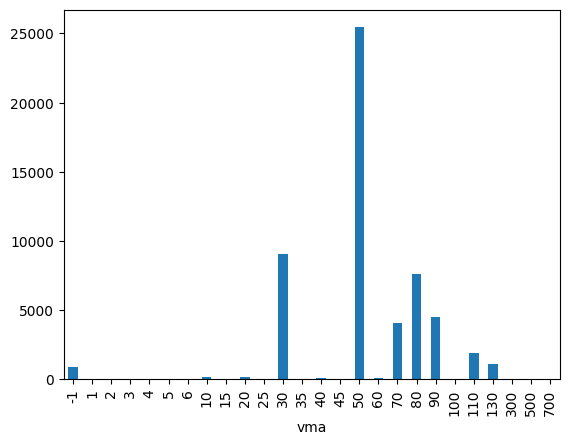

In [7]:
lieux['vma'].value_counts().sort_index().plot(kind ='bar')

<Axes: xlabel='vma'>

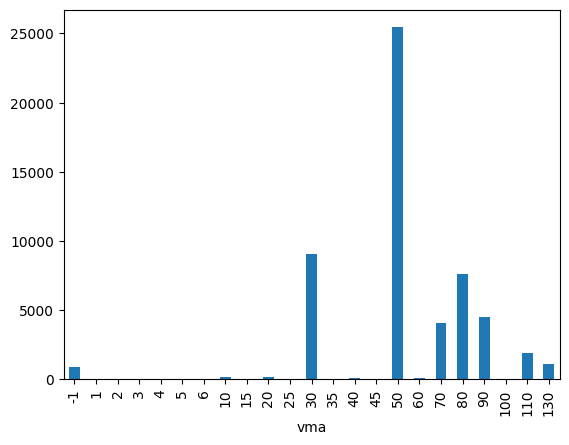

In [9]:
lieuxv = lieux['vma']
lieuxv.loc[( lieux['vma'] <=280)].value_counts().sort_index().plot(kind = 'bar')

On remarque que la plupart des accidents ont lieu à 50 km/h et pas au dessus de 100km/h : ce sont des accidents moins dangereux.


Quelles sont les surfaces qui causent le plus d'accidents ? les surfaces mouillées ? -> proportion?

<Axes: xlabel='surf'>

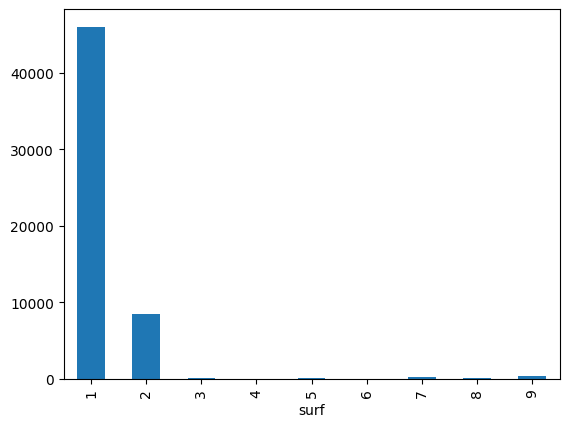

In [11]:
lieus = lieux['surf']
lieus.loc[(lieux['surf'] !=-1)].value_counts().sort_index().plot(kind ='bar')

très peu d'accidents arrivent sur des surfaces autres que 1 et 2 : qui sont les surfaces normales et mouillées (le reste est enneigée, boueux etc..) -> au final les surfaces ne sont pas très pertinentes. Regardons maintenant les catégories de route où arrivent les accidents.

<Axes: xlabel='catr'>

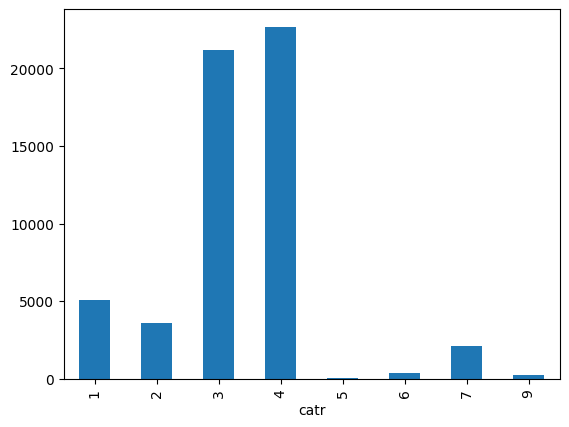

In [10]:
lieuxc =lieux['catr']
lieuxc.value_counts().sort_index().plot(kind ='bar')


Les catégories de route les plus impliqués sont les : routes départementales (3), voies communales (4), autoroutes (1) et routes de métropoles urbaines (7). Ainsi, cela est contre intuitif, on pourrait penser que les autoroutes causent beaucoup d'accidents car on y roule plus vite mais ce n'est pas le cas.